<a href="https://colab.research.google.com/github/sckgn/FinalYearProject_ML/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset_saudi.csv to dataset_saudi.csv
Saving dataset_2018.csv to dataset_2018.csv


In [2]:
import os 
import pandas as pd
import sklearn
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read in ASDTest dataset
asd_2018_df = pd.read_csv("dataset_2018.csv")

asd_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [3]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'},inplace=True)

In [4]:
asd_2018_df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'ASD_Traits'],
      dtype='object')

In [5]:
mixed_df = asd_2018_df.drop(['Case_No','Qchat-10-Score'],axis=1)
mixed_df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'ASD_Traits'],
      dtype='object')

In [6]:
females = mixed_df.copy()


female_df = females[females['Sex']=='f']

female_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 1049
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      319 non-null    int64 
 1   A2                      319 non-null    int64 
 2   A3                      319 non-null    int64 
 3   A4                      319 non-null    int64 
 4   A5                      319 non-null    int64 
 5   A6                      319 non-null    int64 
 6   A7                      319 non-null    int64 
 7   A8                      319 non-null    int64 
 8   A9                      319 non-null    int64 
 9   A10                     319 non-null    int64 
 10  Age_Mons                319 non-null    int64 
 11  Sex                     319 non-null    object
 12  Ethnicity               319 non-null    object
 13  Jaundice                319 non-null    object
 14  Family_mem_with_ASD     319 non-null    object
 15  Who c

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder()
scaler = StandardScaler()

age = ['Age_Mons']
char_vals = ['ASD_Traits','Sex', 'Jaundice', 'Family_mem_with_ASD','Who completed the test', 'Ethnicity']
target = ['ASD_Traits']

mixed_df['Age_Mons'] = scaler.fit_transform(mixed_df['Age_Mons'].values.reshape(-1,1)) 

for c in char_vals:
    mixed_df[c] = encoder.fit_transform(mixed_df[c].values.reshape(-1,1)).toarray()
mixed_df.dtypes
mixed_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,0.016652,1.0,0.0,0.0,1.0,0.0,1.0
1,1,1,0,0,0,1,1,0,0,0,1.019590,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,0,0,1,1,0,1,1.019590,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,1,1,1,1,1,1,1,1,-0.484817,0.0,1.0,1.0,1.0,0.0,0.0
4,1,1,0,1,1,1,1,1,1,1,-0.986286,1.0,0.0,1.0,0.0,0.0,0.0


In [8]:
female_df['Age_Mons'] = scaler.fit_transform(female_df['Age_Mons'].values.reshape(-1,1)) 

for c in char_vals:
    female_df[c] = encoder.fit_transform(female_df[c].values.reshape(-1,1)).toarray()
female_df.dtypes
female_df.head()

<ipython-input-8-886d0a9d78ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['Age_Mons'] = scaler.fit_transform(female_df['Age_Mons'].values.reshape(-1,1))
<ipython-input-8-886d0a9d78ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df[c] = encoder.fit_transform(female_df[c].values.reshape(-1,1)).toarray()
<ipython-input-8-886d0a9d78ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,0.197673,1.0,0.0,0.0,1.0,0.0,1.0
4,1,1,0,1,1,1,1,1,1,1,-0.736515,1.0,0.0,1.0,0.0,0.0,0.0
12,0,0,0,0,0,0,0,0,0,0,-0.152647,1.0,0.0,0.0,1.0,0.0,1.0
13,1,1,1,1,0,0,1,0,1,1,-1.320382,1.0,0.0,0.0,1.0,0.0,0.0
17,1,1,1,0,1,1,1,1,0,1,-1.670702,1.0,0.0,0.0,1.0,0.0,0.0


**Mixed correlation**

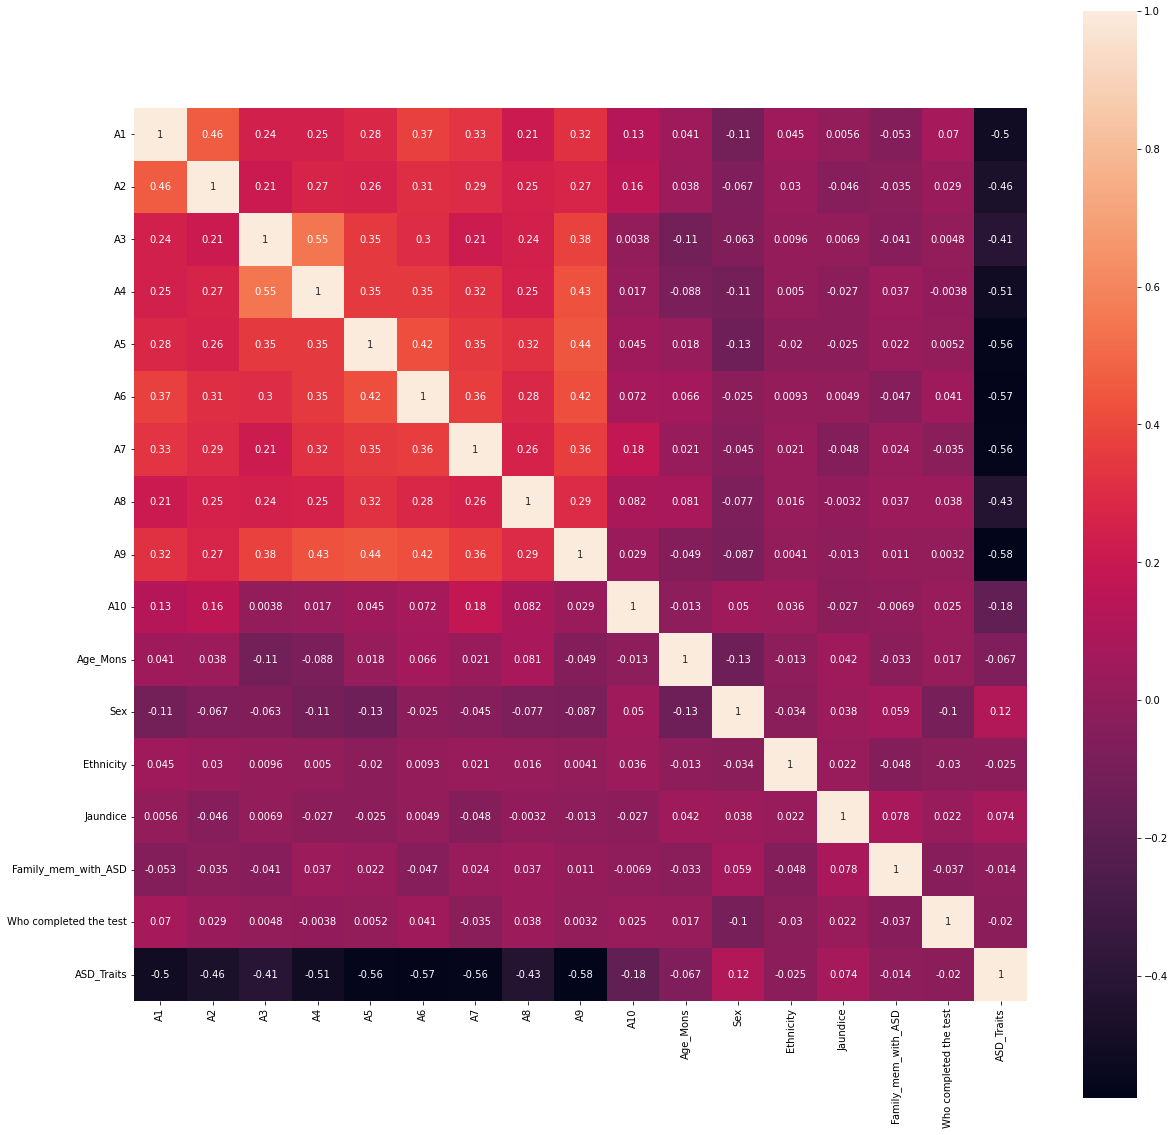

In [9]:
mixed_corr = mixed_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(mixed_corr, annot=True, square=True)
plt.show()

**Female correlation**

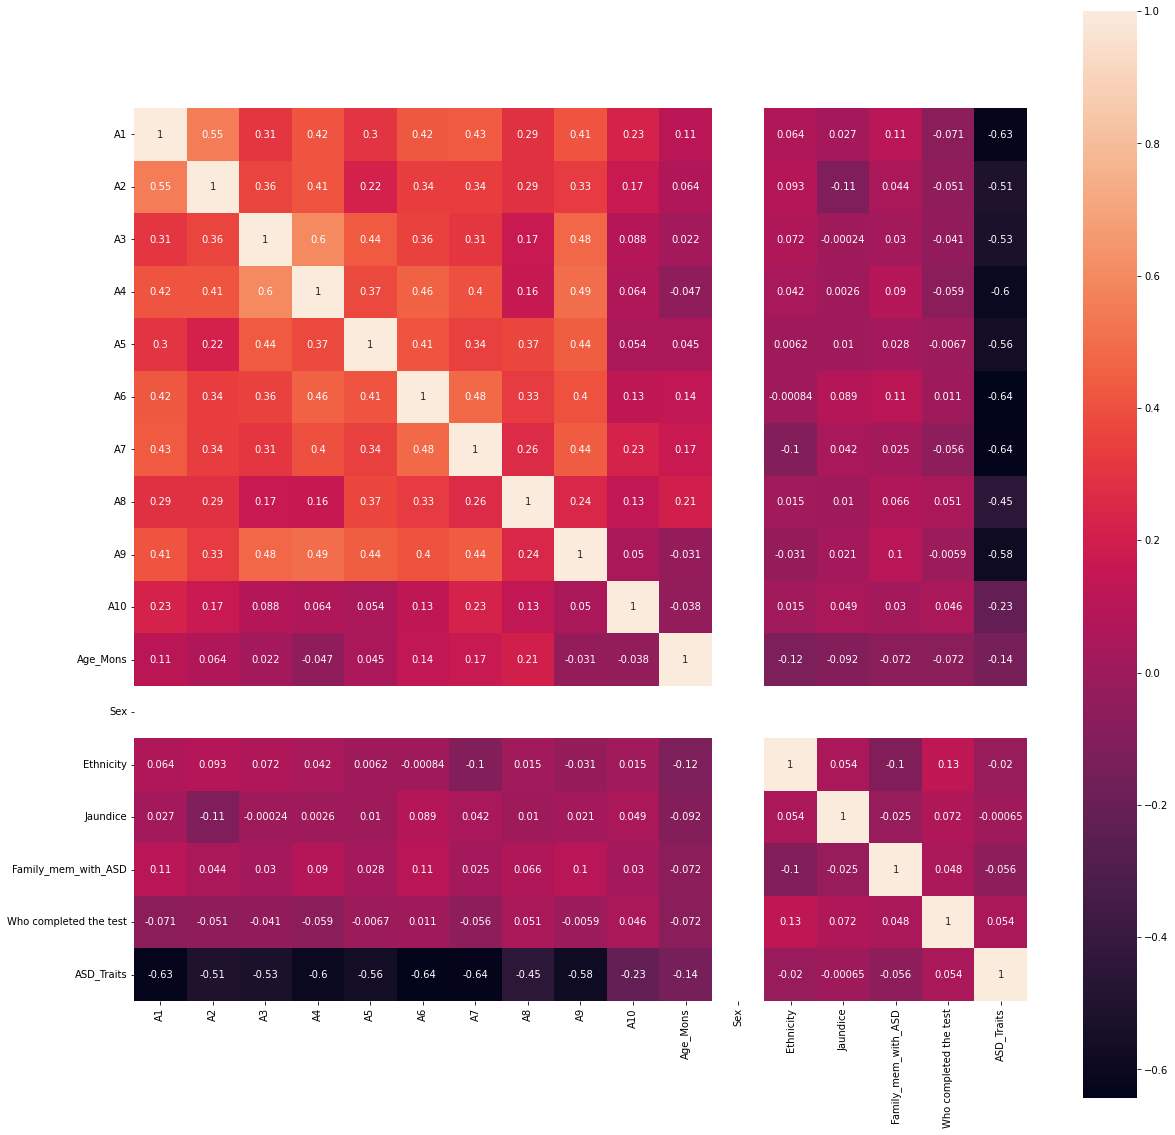

In [10]:
female_corr = female_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(female_corr, annot=True, square=True)
plt.show()

In [11]:
female_corr['ASD_Traits'].sort_values(ascending=True)

A6                       -0.643282
A7                       -0.636822
A1                       -0.629237
A4                       -0.597205
A9                       -0.583583
A5                       -0.562138
A3                       -0.527378
A2                       -0.508535
A8                       -0.447496
A10                      -0.225064
Age_Mons                 -0.144277
Family_mem_with_ASD      -0.056300
Ethnicity                -0.020424
Jaundice                 -0.000653
Who completed the test    0.053806
ASD_Traits                1.000000
Sex                            NaN
Name: ASD_Traits, dtype: float64

In [12]:
mixed_corr['ASD_Traits'].sort_values(ascending=True)

A9                       -0.577336
A6                       -0.569424
A5                       -0.563297
A7                       -0.563177
A4                       -0.505204
A1                       -0.503810
A2                       -0.463467
A8                       -0.427155
A3                       -0.409701
A10                      -0.179833
Age_Mons                 -0.066831
Ethnicity                -0.025481
Who completed the test   -0.019584
Family_mem_with_ASD      -0.013503
Jaundice                  0.074060
Sex                       0.117664
ASD_Traits                1.000000
Name: ASD_Traits, dtype: float64

In [28]:
mixed_vs_f = pd.concat([female_corr['ASD_Traits'].sort_values(ascending=True),mixed_corr['ASD_Traits'].sort_values(ascending=True) ], axis=1)
mixed_vs_f.columns=['Female only ', 'Mixed dataset']

mixed_vs_f

,Female only,Mixed dataset
A6,-0.643282,-0.569424
A7,-0.636822,-0.563177
A1,-0.629237,-0.503810
A4,-0.597205,-0.505204
A9,-0.583583,-0.577336
A5,-0.562138,-0.563297
A3,-0.527378,-0.409701
A2,-0.508535,-0.463467
A8,-0.447496,-0.427155
A10,-0.225064,-0.179833


In [14]:
female_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 1049
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A1                      319 non-null    int64  
 1   A2                      319 non-null    int64  
 2   A3                      319 non-null    int64  
 3   A4                      319 non-null    int64  
 4   A5                      319 non-null    int64  
 5   A6                      319 non-null    int64  
 6   A7                      319 non-null    int64  
 7   A8                      319 non-null    int64  
 8   A9                      319 non-null    int64  
 9   A10                     319 non-null    int64  
 10  Age_Mons                319 non-null    float64
 11  Sex                     319 non-null    float64
 12  Ethnicity               319 non-null    float64
 13  Jaundice                319 non-null    float64
 14  Family_mem_with_ASD     319 non-null    f

In [15]:
female_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,0.197673,1.0,0.0,0.0,1.0,0.0,1.0
4,1,1,0,1,1,1,1,1,1,1,-0.736515,1.0,0.0,1.0,0.0,0.0,0.0
12,0,0,0,0,0,0,0,0,0,0,-0.152647,1.0,0.0,0.0,1.0,0.0,1.0
13,1,1,1,1,0,0,1,0,1,1,-1.320382,1.0,0.0,0.0,1.0,0.0,0.0
17,1,1,1,0,1,1,1,1,0,1,-1.670702,1.0,0.0,0.0,1.0,0.0,0.0


In [16]:
df_no_s = female_df.copy()
df_no_s = df_no_s.drop(['Sex'],axis=1)

df_no_s.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,0.197673,0.0,0.0,1.0,0.0,1.0
4,1,1,0,1,1,1,1,1,1,1,-0.736515,0.0,1.0,0.0,0.0,0.0
12,0,0,0,0,0,0,0,0,0,0,-0.152647,0.0,0.0,1.0,0.0,1.0
13,1,1,1,1,0,0,1,0,1,1,-1.320382,0.0,0.0,1.0,0.0,0.0
17,1,1,1,0,1,1,1,1,0,1,-1.670702,0.0,0.0,1.0,0.0,0.0


**Female Correlation, No 'Sex' Attribute**

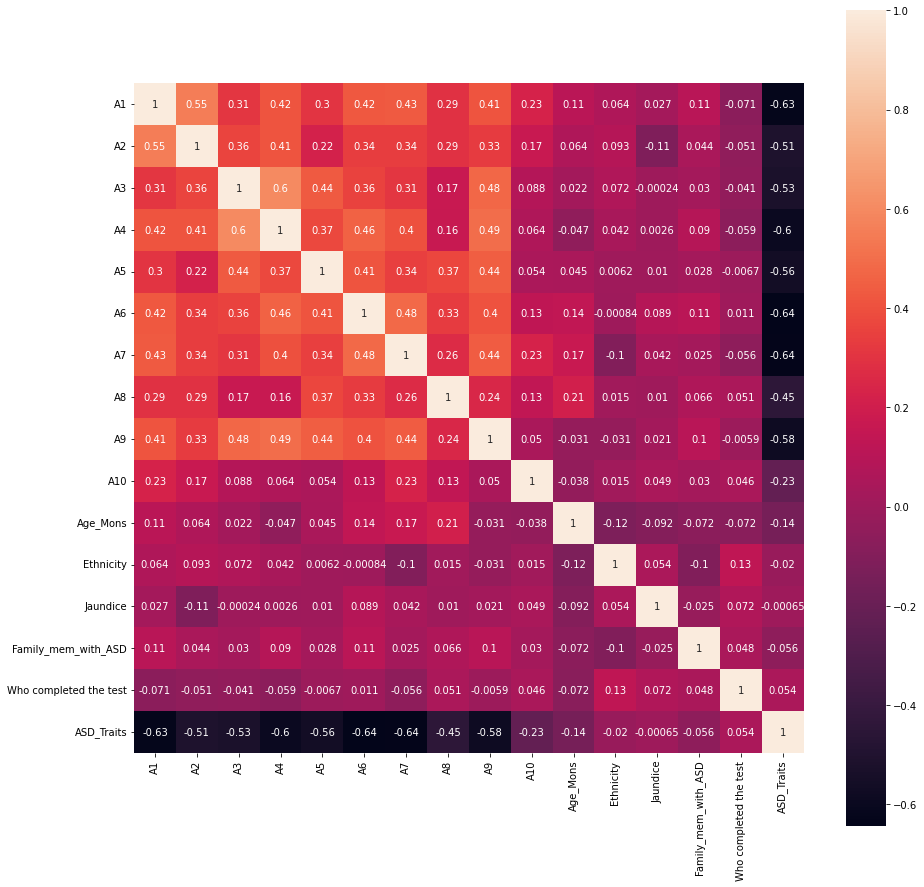

In [17]:
no_s_corr = df_no_s.corr()

plt.figure(figsize=(15,15))
sns.heatmap(no_s_corr, annot=True, square=True)
plt.show()

In [18]:
no_s_corr['ASD_Traits'].sort_values(ascending=True)

A6                       -0.643282
A7                       -0.636822
A1                       -0.629237
A4                       -0.597205
A9                       -0.583583
A5                       -0.562138
A3                       -0.527378
A2                       -0.508535
A8                       -0.447496
A10                      -0.225064
Age_Mons                 -0.144277
Family_mem_with_ASD      -0.056300
Ethnicity                -0.020424
Jaundice                 -0.000653
Who completed the test    0.053806
ASD_Traits                1.000000
Name: ASD_Traits, dtype: float64

In [19]:
#13 groups up to 2 years old
#12 groups > 2 years old
# max age 3 year old 
asd_2018_df['Age_Mons'].value_counts()

36    320
24     70
30     67
12     67
28     42
26     36
33     36
34     34
15     31
31     30
35     30
32     30
23     28
22     27
25     26
29     24
27     23
19     21
20     21
14     19
13     18
18     16
21     13
16     13
17     12
Name: Age_Mons, dtype: int64

In [20]:
two_y_old = asd_2018_df[asd_2018_df['Age_Mons'] <= 24]
two_y_old['Age_Mons'].value_counts()

24    70
12    67
15    31
23    28
22    27
20    21
19    21
14    19
13    18
18    16
21    13
16    13
17    12
Name: Age_Mons, dtype: int64

In [21]:
three_y_old = asd_2018_df[asd_2018_df['Age_Mons'] > 24]
three_y_old['Age_Mons'].value_counts()

36    320
30     67
28     42
33     36
26     36
34     34
35     30
32     30
31     30
25     26
29     24
27     23
Name: Age_Mons, dtype: int64

In [22]:
two_y_old['Age_Mons'] = scaler.fit_transform(two_y_old['Age_Mons'].values.reshape(-1,1)) 

for c in char_vals:
    two_y_old[c] = encoder.fit_transform(two_y_old[c].values.reshape(-1,1)).toarray()
two_y_old.dtypes
two_y_old.head()
two_y_old = two_y_old.drop(['Case_No','Qchat-10-Score'], axis=1)

<ipython-input-22-e017b1a91995>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_y_old['Age_Mons'] = scaler.fit_transform(two_y_old['Age_Mons'].values.reshape(-1,1))
<ipython-input-22-e017b1a91995>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_y_old[c] = encoder.fit_transform(two_y_old[c].values.reshape(-1,1)).toarray()
<ipython-input-22-e017b1a91995>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

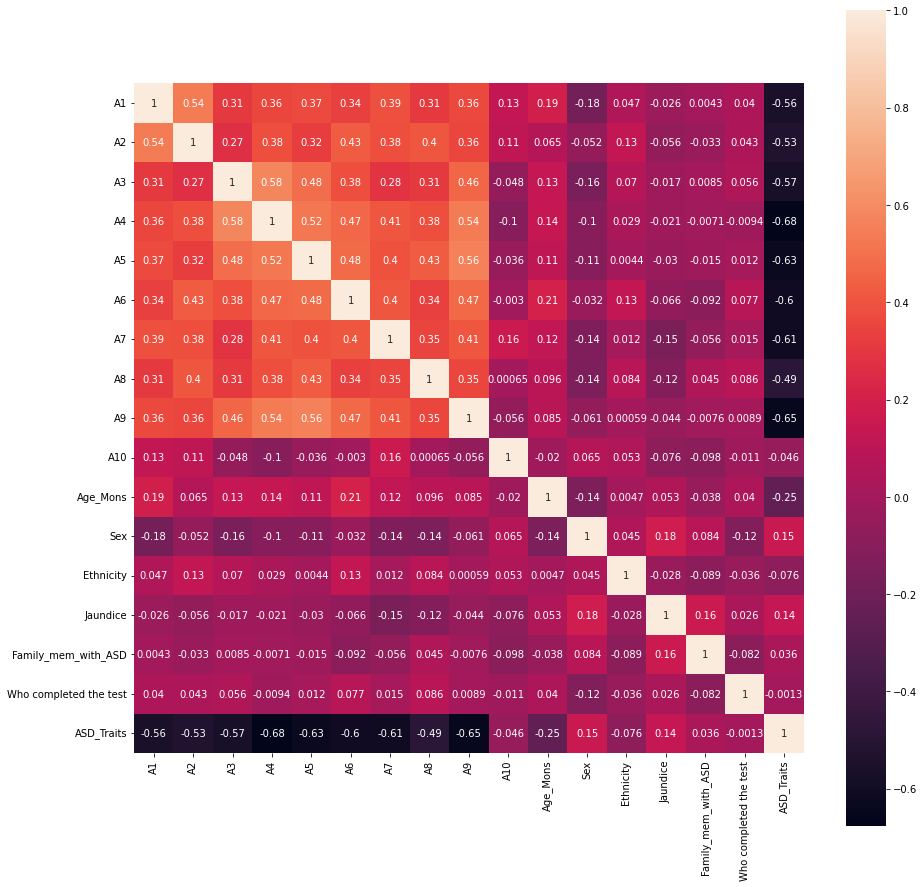

In [23]:
two_corr = two_y_old.corr()

plt.figure(figsize=(15,15))
sns.heatmap(two_corr, annot=True, square=True)
plt.show()

In [24]:
two_corr['ASD_Traits'].sort_values(ascending=True)

A4                       -0.676549
A9                       -0.647195
A5                       -0.634646
A7                       -0.606173
A6                       -0.604648
A3                       -0.570407
A1                       -0.561239
A2                       -0.527827
A8                       -0.490830
Age_Mons                 -0.254603
Ethnicity                -0.076084
A10                      -0.045746
Who completed the test   -0.001276
Family_mem_with_ASD       0.036481
Jaundice                  0.135433
Sex                       0.149473
ASD_Traits                1.000000
Name: ASD_Traits, dtype: float64

In [25]:
three_y_old = three_y_old.drop(['Case_No','Qchat-10-Score'], axis=1)

three_y_old['Age_Mons'] = scaler.fit_transform(three_y_old['Age_Mons'].values.reshape(-1,1)) 

for c in char_vals:
    three_y_old[c] = encoder.fit_transform(three_y_old[c].values.reshape(-1,1)).toarray()
three_y_old.dtypes
three_y_old.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,-1.304084,1.0,0.0,0.0,1.0,0.0,1.0
1,1,1,0,0,0,1,1,0,0,0,0.870298,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,0,0,1,1,0,1,0.870298,0.0,0.0,0.0,1.0,0.0,0.0
6,1,0,0,1,1,1,0,0,1,0,0.054905,0.0,0.0,0.0,1.0,0.0,0.0
7,0,1,0,0,1,0,1,1,1,1,0.054905,0.0,0.0,0.0,1.0,0.0,0.0


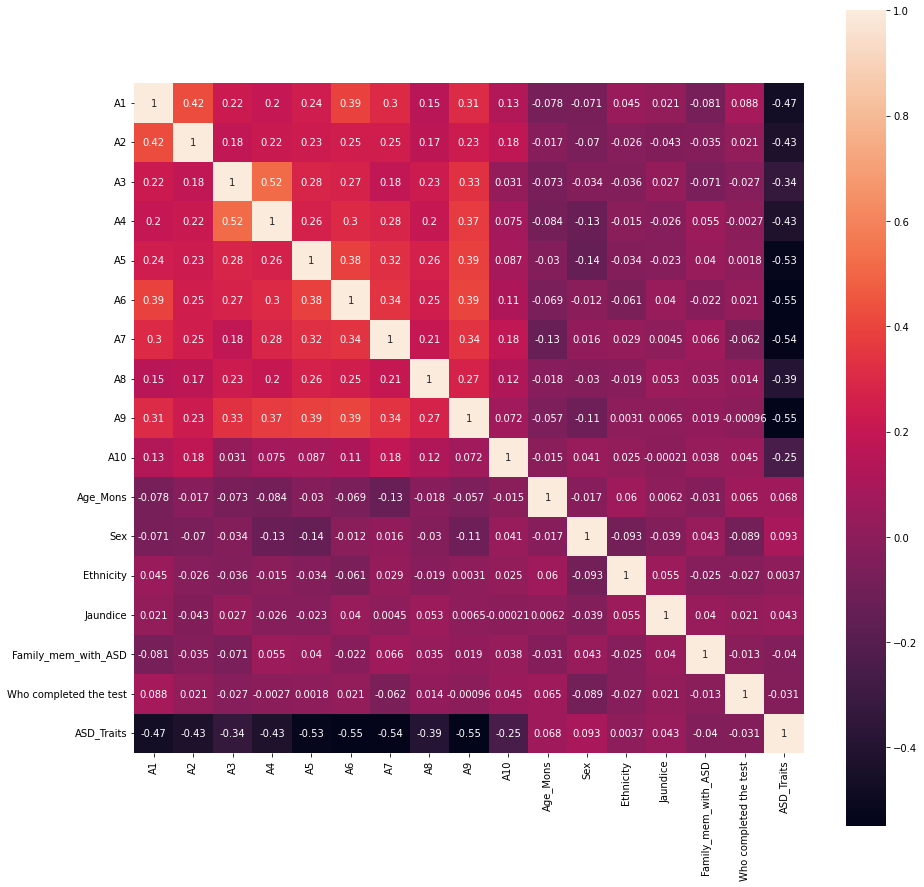

In [27]:
three_corr = three_y_old.corr()
plt.figure(figsize=(15,15))
sns.heatmap(three_corr, annot=True, square=True)
plt.show()

In [26]:

col_name = 'ASD_Traits'

new_pd = pd.DataFrame()


new_pd = pd.concat([three_corr['ASD_Traits'], two_corr['ASD_Traits'], female_corr['ASD_Traits'], mixed_corr['ASD_Traits']], axis=1)

new_pd.columns=["Three year olds", 'Two year olds','Female only ', 'Mixed dataset']
# three_corr['ASD_Traits'].sort_values(ascending=True)
new_pd



,Three year olds,Two year olds,Female only,Mixed dataset
A1,-0.472335,-0.561239,-0.629237,-0.503810
A2,-0.428674,-0.527827,-0.508535,-0.463467
A3,-0.335977,-0.570407,-0.527378,-0.409701
A4,-0.427591,-0.676549,-0.597205,-0.505204
A5,-0.526021,-0.634646,-0.562138,-0.563297
A6,-0.549063,-0.604648,-0.643282,-0.569424
A7,-0.538561,-0.606173,-0.636822,-0.563177
A8,-0.391789,-0.490830,-0.447496,-0.427155
A9,-0.546302,-0.647195,-0.583583,-0.577336
A10,-0.251215,-0.045746,-0.225064,-0.179833
